SMOTE:
Diabetes_binary
0                  174595
1                  174595
Name: count, dtype: int64


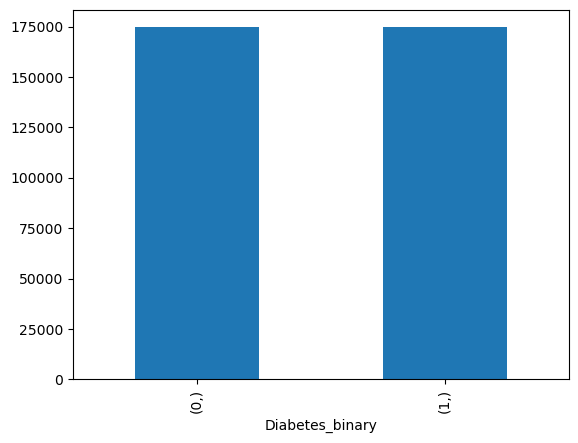

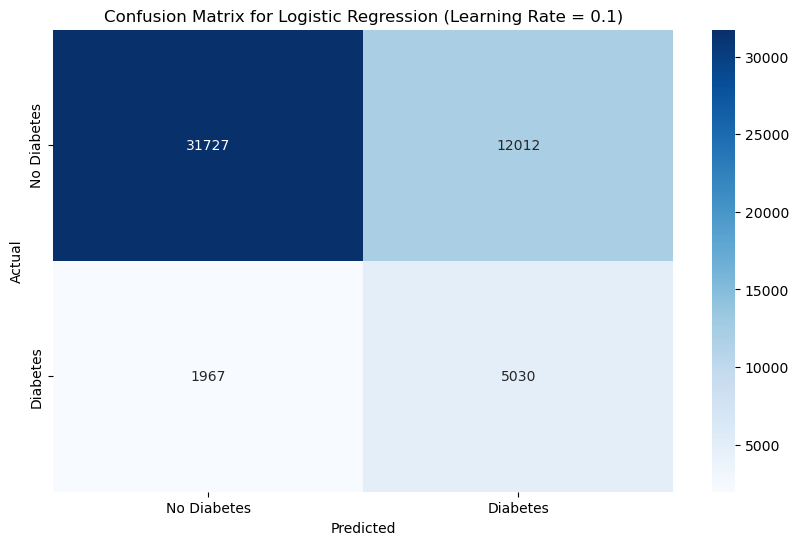

Classification Report for Gaussian NB (Learning Rate = 0.1):
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     43739
           1       0.30      0.72      0.42      6997

    accuracy                           0.72     50736
   macro avg       0.62      0.72      0.62     50736
weighted avg       0.85      0.72      0.76     50736

Specificity:         72.5 

Sensitivity:         71.89999999999999 (Recall)


In [19]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import scipy 
from scipy import stats 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo 
import sys 
from io import StringIO
import seaborn as sns

def standardize_data(data):
    data_standardized = data.copy()
    names = data.columns
    for name in names:
        data_standardized[name] = stats.zscore(data[name])
    return data_standardized

# Fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

X = standardize_data(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
y_resampled_smote.value_counts().plot(kind = 'bar')
print("SMOTE:")
print(y_resampled_smote.value_counts())

# Train Logistic Regression models with different learning rates
log_reg_models = []
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

gaus = GaussianNB()
gaus.fit(X_resampled_smote,np.ravel(y_resampled_smote,order='C'))#y_resampled_smote)
y_pred = gaus.predict(X_test)

metrics['accuracy'].append(accuracy_score(y_test, y_pred))
metrics['precision'].append(precision_score(y_test, y_pred, average='weighted'))
metrics['recall'].append(recall_score(y_test, y_pred, average='weighted'))
metrics['f1'].append(f1_score(y_test, y_pred, average='weighted'))

plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix for Logistic Regression (Learning Rate = {lr})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for each learning rate
print(f'Classification Report for Gaussian NB (Learning Rate = {lr}):\n{classification_report(y_test, y_pred)}')
TN, FP    = cm[0, 0], cm[0, 1]
FN, TP    = cm[1, 0], cm[1, 1]

print('Specificity:        ',  round(TN / float(TN + FP),3)*100, "\n")
print('Sensitivity:        ',  round(TP / float(TP + FN),3)*100, "(Recall)")